# HSE 2021: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/> 
Enter numbers `a`,  `d` и `N`. Find sum of the first `N` members of arithmetic progression with the first member `a` and difference `d`, without using formula for the sum.

In [42]:
def find_sum(a,d,N):
  res = 0
  val = a
  for _ in range(N):
    res += val
    val += d
  return res

Check yourself

In [43]:
a = 2
d = 3
N = 15
assert find_sum(a,d,N) == 345, 'Wrong answer'

---
**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a prime number.

In [44]:
def check_prime(N):
  for i in range(2, N):
    if N % i == 0:
      return False
  return True

Check yourself

In [45]:
inp = [3, 8, 13, 111, 113, 237, 307, 479, 481]
answer = [True, False, True, False, True, False, True, True, False]

for N, ans in zip(inp, answer):
    assert check_prime(N) == ans, f'Wrong answer for input {N}, {ans} is expected'

---
**Task 3** (0.5 points) <br/> 
Find the first `N` prime numbers (you may use the function from the previous task).

In [46]:
def find_primes(N):
  res = []
  i = 2
  while len(res) < N:
    if check_prime(i):
      res.append(i)
    i += 1
  return res

Check yourself

In [47]:
assert find_primes(5) == [2, 3, 5, 7, 11], 'Wrong answer'

---
**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` or any other functions, find the maximum number.

In [48]:
def find_max(a, b, c):
  if a > b:
    a,b = b,a
  if b > c:
    c,b = b,c
  return c

Check yourself

In [49]:
from random import randint
for i in range(10):    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    answer = np.max([a, b, c])  # You cannot use `np.max` in the solution ;)
    print(f'Checking on {a, b, c}')
    assert find_max(a, b, c) == answer, f'Wrong maximum, {answer} is expected'

Checking on (51, 30, 71)
Checking on (-6, 58, -59)
Checking on (-80, -52, 99)
Checking on (52, -5, 38)
Checking on (68, 19, 57)
Checking on (18, 17, 6)
Checking on (91, 50, 4)
Checking on (4, -46, 45)
Checking on (98, -61, -78)
Checking on (-11, 32, 49)


# 2. Numpy (4 points)
### **!Do not use loops in the tasks below, see disclamer at the top of the notebook**

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 20 and with sum of its elements equals to 3.

In [50]:
my_array = np.random.rand(20)
my_array /= np.sum(my_array)/3


Check yourself

In [51]:
assert len(my_array) == 20
assert np.allclose(np.sum(my_array), 3)

---
**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special functions. You may only use basic numpy operations (first level functions like `np.dot` are ok, higher level functions like `np.linalg.*` are prohibited).**:

* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2}, \,\, \text{where}\,\, ||a||_2 = \sqrt{\sum_i a_i^2} $$

In [52]:
def cal_euclidean(a, b):
  return np.sqrt(np.sum((a-b)**2))

def cal_manhattan(a, b):
  return np.sum(np.abs(a-b))

def cal_cosine(a, b):
  return 1 - np.dot(a, b) / np.sqrt(np.sum(a**2)) / np.sqrt(np.sum(b**2))

Check yourself

In [53]:
a = np.ones(10)*0.1
b = np.ones(10)

assert np.allclose(cal_euclidean(a, b), 2.846049)
assert np.allclose(cal_manhattan(a, b), 9)
assert np.allclose(cal_cosine(a, b), 0)

---
**Task 3** (0.5 points) <br/>
Create a function `custom_scaler`, which takes as input an array with integer values and transforms an array, so that:
* Maximum element(s) value is 2 (it **doesn't** mean `a[max_index] = 2`)
* Minimum element(s) value is -2 (it **doesn't** mean `a[min_index] = -2`)
* Other values are in the interval [-2, 2] (using **arithmetic** transformations)

In [54]:
def custom_scaler(my_array):
  my_array -= np.min(my_array)
  float_arr = my_array / np.max(my_array)
  float_arr *= 4
  float_arr -= 2
  return float_arr

Check yourself

In [55]:
test_array = np.random.randint(-100, 100, size=4)
result = custom_scaler(test_array)
print(test_array, '->>', result)

assert np.allclose(np.max(result), 2), f'Maximum value shoul be 2, got {np.max(result)} instead'
assert np.allclose(np.min(result), -2), f'Minimum value should be -2, got {np.min(result)} instead'
assert np.sum(result < -2) + np.sum(result > 2) == 0, 'All elements are supposed to be between -2 and 2'

[  0 127  39  41] ->> [-2.          2.         -0.77165354 -0.70866142]


---
**Task 4** (0.5 points) <br/>
Create an array with shape of $5 \times 6$ with integers from [0,50]. Select a column which contains the maximum element of the array.

In [56]:
my_array = np.random.randint(0, 51, (5,6))
max_index = np.unravel_index(np.argmax(my_array), my_array.shape)
selected_column = my_array[:, max_index[1]]

In [57]:
print(f'Array:\n {my_array}')
print(f'Shape: {my_array.shape}')
print(f'Selected column {selected_column}')

Array:
 [[17 34 12 38 44 36]
 [11 12 13 12 41  4]
 [ 0 49 45 29  6  3]
 [37 25 19 20  8  4]
 [38  4 26 49  3 36]]
Shape: (5, 6)
Selected column [34 12 49 25  4]


---
**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with mean.

In [58]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print(f'Given array: {np.array2string(arr, precision=2)}')

Given array: [0.64 0.05  nan 0.04  nan  nan 0.99 0.62 0.6  0.79]


In [59]:
arr[np.isnan(arr)] = np.mean(arr[np.logical_not(np.isnan(arr))])

print(f'Result: {np.array2string(arr, precision=2)}')

Result: [0.64 0.05 0.53 0.04 0.53 0.53 0.99 0.62 0.6  0.79]


---
**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for each of 3 channels (a vector of shape 3).

In [60]:
def mean_channel(X):
  return np.mean(X, (0,1))

In [61]:
n = 28
m = 16
X = np.random.randint(-10, 10, size=(n,m,3))
mean_channel(X)

array([-0.15625   , -0.66741071, -0.75446429])

---
**Task 7** (1 points) <br/>
Create a function which takes a matrix ```X``` as an input and returns all its unique rows as a matrix, i.e. in a 3D matrix you need to return all unique horizontal layers.

Sample input:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])
        
Sample output:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])

In [62]:
def get_unique_rows(X):
  return np.unique(X, axis=0)

In [63]:
X = np.array([
  [[4, 4],
   [5, 5]],

  [[4, 5],
   [5, 5]],

  [[4, 4],
   [5, 4]],

  [[4, 5],
   [5, 5]],

  [[5, 4],
   [4, 4]],

  [[5, 5],
   [4, 5]]
])

Y = np.array([
  [[4, 4],
   [5, 4]],

  [[4, 4],
   [5, 5]],

  [[4, 5],
   [5, 5]],

  [[5, 4],
   [4, 4]],

  [[5, 5],
   [4, 5]]
])

np.allclose(get_unique_rows(X), Y)

True

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset

In [64]:
dataset = pd.read_csv("titanic.csv", index_col=0)
dataset.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


---
**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In which columns?
    * How many classes (pclass) were there on Tinanic?
    * What is the percentage of survived passengers? Are the classes balanced?
    * What is the average ticket fare?
    * What was the most popular port of embarkation?
Please, write not only the answers but the code, proving it.

In [65]:
print("Are there any missing values? In which columns?")
print(dataset.isna().sum())

Are there any missing values? In which columns?
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [66]:
print("How many classes (pclass) were there on Tinanic?")
print(len(dataset["Pclass"].unique()))

How many classes (pclass) were there on Tinanic?
3


In [67]:
def percentage_of_survived_passengers(ds):
  val = sum(ds['Survived'])/len(ds)*100
  return f"{val:.2f}%"

print("What is the percentage of survived passengers?")
print(percentage_of_survived_passengers(dataset))

print()
print("Are the classes balanced?")
print("class 1 ->", percentage_of_survived_passengers(dataset[dataset['Pclass'] == 1]))
print("class 2 ->", percentage_of_survived_passengers(dataset[dataset['Pclass'] == 2]))
print("class 3 ->", percentage_of_survived_passengers(dataset[dataset['Pclass'] == 3]))
print("No!!")

What is the percentage of survived passengers?
38.38%

Are the classes balanced?
class 1 -> 62.96%
class 2 -> 47.28%
class 3 -> 24.24%
No!!


In [68]:
print("What is the average ticket fare?")
print(f"{dataset['Fare'].mean():.2f}")

What is the average ticket fare?
32.20


In [69]:
print("What was the most popular port of embarkation?")
print(dataset['Embarked'].mode()[0])

What was the most popular port of embarkation?
S


---
**Task 2** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column `Name`, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [70]:
dataset['Title'] = dataset['Name'].str.extract(r' ([a-zA-Z]+\.) ')

print("How many are there unique titles?")
print(dataset['Title'].nunique())

print()
print("How many are there passengers with every title?")
print(dataset['Title'].value_counts())

print()
print("What is the most popular man's title? And woman's title?")
print("male ->", dataset[dataset['Sex'] == 'male']['Title'].value_counts().idxmax())
print("female ->", dataset[dataset['Sex'] == 'female']['Title'].value_counts().idxmax())

How many are there unique titles?
17

How many are there passengers with every title?
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Jonkheer.      1
Ms.            1
Don.           1
Lady.          1
Capt.          1
Countess.      1
Mme.           1
Sir.           1
Name: Title, dtype: int64

What is the most popular man's title? And woman's title?
male -> Mr.
female -> Miss.


---
**Task 3** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? Visualize it on the plot
    * Make conclusions about what you see on the plot

mean age -> 29.70


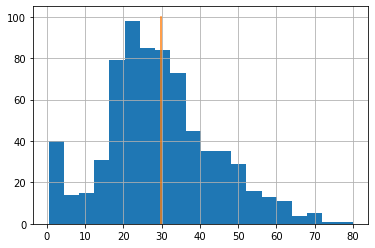

распределение похоже на нормальное, только детей много


In [71]:
dataset["Age"].hist(bins=20)
mage = dataset['Age'].mean()
print(f"mean age -> {mage:.2f}")
plt.plot((mage,mage), (0, 100))
plt.show()
print("распределение похоже на нормальное, только детей много")

---
**Task 4** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Make conclusions about what you see on the plot

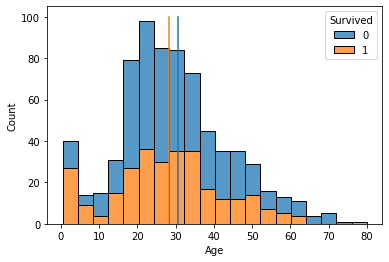

your chance of survival doesnt depend on your age, unless you are a baby


In [72]:
sns.histplot(x="Age", hue="Survived", data=dataset, multiple="stack")
survived_mage = dataset[dataset['Survived'] == 1]['Age'].mean()
dead_mage = dataset[dataset['Survived'] == 0]['Age'].mean()
plt.plot((dead_mage,dead_mage), (0, 100), color='C0')
plt.plot((survived_mage,survived_mage), (0, 100), color='C1')
plt.show()
print("your chance of survival doesnt depend on your age, unless you are a baby")

In [73]:
print(f"class 1 -> mean age {dataset[dataset['Pclass'] == 1]['Age'].mean():.2f}")
print(f"class 2 -> mean age {dataset[dataset['Pclass'] == 2]['Age'].mean():.2f}")
print(f"class 3 -> mean age {dataset[dataset['Pclass'] == 3]['Age'].mean():.2f}")
print("the older you are the more likely you are to be rich")

class 1 -> mean age 38.23
class 2 -> mean age 29.88
class 3 -> mean age 25.14
the older you are the more likely you are to be rich


---
**Task 5** (0.5 points) <br/>
Is there correlation between the port of embarkation and the ticket price? Calculate mean price for each port and visualize price distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). The main point here is to **choose** plots wisely and **make meaningful conclusions**



prot C -> mean fare 59.95
prot Q -> mean fare 13.28
prot S -> mean fare 27.08


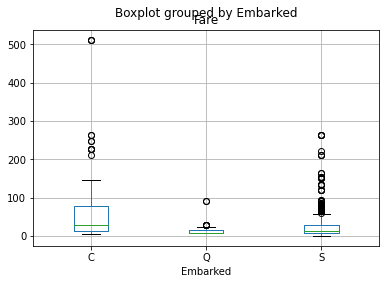

Queenstown is the chepest port, and Cherbourg is the most expensive and also has a lot of huge outliers


In [74]:
print(f"prot C -> mean fare {dataset[dataset['Embarked'] == 'C']['Fare'].mean():.2f}")
print(f"prot Q -> mean fare {dataset[dataset['Embarked'] == 'Q']['Fare'].mean():.2f}")
print(f"prot S -> mean fare {dataset[dataset['Embarked'] == 'S']['Fare'].mean():.2f}")

dataset.boxplot("Fare", by="Embarked")
plt.show() # C = Cherbourg, Q = Queenstown, S = Southampton
print("Queenstown is the chepest port, and Cherbourg is the most expensive and also has a lot of huge outliers")

---
**Task 6** (0.5 points) <br/>
The same question as in task 5 about correlation between *pclass* and *ticket priсe*.

class 1 -> mean fare 84.15
class 2 -> mean fare 20.66
class 3 -> mean fare 13.68


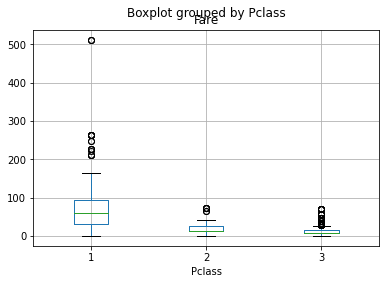

Well obviously class corelates with ticket price. If we look at the boxes in the boxplot, the bottom of the 1st class box is higher then the top of the 2nd class box and so on


In [75]:
print(f"class 1 -> mean fare {dataset[dataset['Pclass'] == 1]['Fare'].mean():.2f}")
print(f"class 2 -> mean fare {dataset[dataset['Pclass'] == 2]['Fare'].mean():.2f}")
print(f"class 3 -> mean fare {dataset[dataset['Pclass'] == 3]['Fare'].mean():.2f}")

dataset.boxplot("Fare", by="Pclass")
plt.show()
print("Well obviously class corelates with ticket price. If we look at the boxes in the boxplot, the bottom of the 1st class box is higher then the top of the 2nd class box and so on")